# Проект "Исследование закономерностей, определяющих успешность игр"

# Описание проекта
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Нам нужно выявить определяющие успешность игры закономерности. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
У нас есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 
Данные за 2016 год могут быть неполными.

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План работы:
1. Откроем файл с данными и изучим общую информацию
2. Выполним предобработку данных, попробуем заполнить пропуски, проверим данные на наличие явных и неявных дубликатов, поменять тип данных, если это потребуется.
3. Проведем исследовательский анализ данных, изучим следующую информацию:
Проверим сколько игр выпускалось в разные годы;
Проверим, как менялись продажи по платформам и попробуем определить срок за который появляются новые и исчезают старые платформы;
Попробуем определить актуальный период данных;
Выясним, какие платформы лидируют по продажам и выберем несколько потенциально прибыльных платформ;
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
Проанализируем общее распределение игр по жанрам, попробуем выделить жанры с высокими и низкими продажами.
4. Составим портрет пользователя каждого региона:
Для каждого региона определим самые популярные платформы (топ-5);
Для каждого региона определим самые популярные жанры (топ-5);
Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.
5. Проверим две гипотезы:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action и Sports разные.
6. Напишем вывод о полученной в ходе исследования информации.

## Откроем файл и изучим общую информацию

In [1]:
# Импортируем библиотеки, которые понадобятся нам в этом проекте 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import binom
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Считаем данные из csv-файла в датафрейми сохраним в переменную
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')



In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод: мы открыли файл и посмотрели общую информацию о нем. Пока смущает тип данных в столбцах User_Score и Year_of_Release.

## Выполним предобработку данных

In [5]:
# Приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [6]:
# Проверим, что изменение прошло корректно
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
# Поменяем тип данных в столбце year_of_release
games['year_of_release'] = np.floor(pd.to_numeric(games['year_of_release'], errors='coerce')).astype('Int64')

In [8]:
# Проверяем, что изменение прошло корректно
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [9]:
# Проверим сколько пропусков есть в нашей таблице
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
# Посчитаем долю пропусков
pd.DataFrame(games.isna().mean()*100).style.background_gradient('coolwarm')

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


**Мы видим, что у нас пропуски в столбцах name, year_of_release, genre, critic_score, user_score, rating.
Наибольшее число пропусков в столбцах critic_score, user_score, rating.
Из-за их большого количества, удалить их мы не можем, так как в этом случае мы потеряем большую часть данных.
При этом восстановить их мы тоже не можем, так как мы не знаем критерии оценки критиков , пользователей, ассоциации ESRB и даты выхода конкретных игр.
Поэтому принимаем решение оставить пропуски в столбцах year_of_release, genre, critic_score, user_score, rating.
Строки с пропусками в столбце name мы удаляем, так как невозможно восстановить информацию о названии игр.**

**Пропуски могли появиться из-за того, что часть данных относится к 2016 году и не все данные об играх могли быть опубликованы на тот момент (например, critic_score, user_score, rating).
Похожая ситуация может быть со старыми играми - когда они выходили никто не собирал и не хранил по ним информацию.**

In [11]:
# Удалим строки с пропусками в столбце name
games = games.dropna(subset = ['name'])

##### Отдельно разберемся со значением 'tbd' в столбце user_score
tbd - to be demand, то есть будет определено. Соответственно, сейчас оценка пользователей по каким-то играм из таблицы отсутствует и взять ее объективно не откуда. Поэтому мы можем заменить tbd на np.nan.

In [12]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
6.4     107
5.8      97
9.1      90
6.1      84
5.7      78
5.9      77
5.6      72
5.4      72
5.5      71
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.3      37
4.6      37
4.5      34
4.1      33
4.4      33
9.3      31
3.8      28
4.2      28
4        27
3.5      26
2.8      24
4.7      24
3.1      23
3.4      23
3        21
3.6      20
3.7      19
3.3      15
3.2      13
3.9      13
2.5      12
2        11
9.4      11
2.4      11
1.7       9
2.9       9
2.1       9
2.7       8
9.5       6
2.2       6
1.8       6
1.4       5
2.6       4
1.6       3
1.2       3
2.3       2
1.1       2
0.7 

In [13]:
# Заменим занчения 'tbd' на np.nan
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [14]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
# Теперь мы можем поменять тип значений в столбце user_score
games['user_score'] = games['user_score'].astype('float')

In [16]:
# Проверяем, что изменение прошло корректно
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


##### Проверим сколько явных дубликатов есть в нашей таблице

In [17]:
games.duplicated().sum()

0

**Явных дубликатов не обнаружено.**

##### Произведем проверку на неявные дубликаты в нашей таблице

In [18]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Неявных дубликатов в столбце platform не обнаружено.**

In [19]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [20]:
# Отсортируем таблицу по возрастанию годов, чтобы проверить, что в таблице представлены все года
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

**В таблице представлены все года с 1980 по 2016-й.**

In [21]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**Неявных дубликатов в столбце genre не обнаружено.**

In [22]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

**Все значения в столбце critic_score меньше 100, что отвечает условию задачи.**

In [23]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

**Все значения в столбце user_score меньше 10, что отвечает условию задачи.**

In [24]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
# Согласно интернету рейтинги K-A и Е это одно и тоже. Соответственно, произведем замену
games['rating'] = games['rating'].replace('K-A', 'E')

##### Посчитаем суммарные продажи во всех регионах

In [26]:
games['total_sales'] = games['na_sales'] + games['other_sales'] + games['jp_sales'] + games['eu_sales']

In [27]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


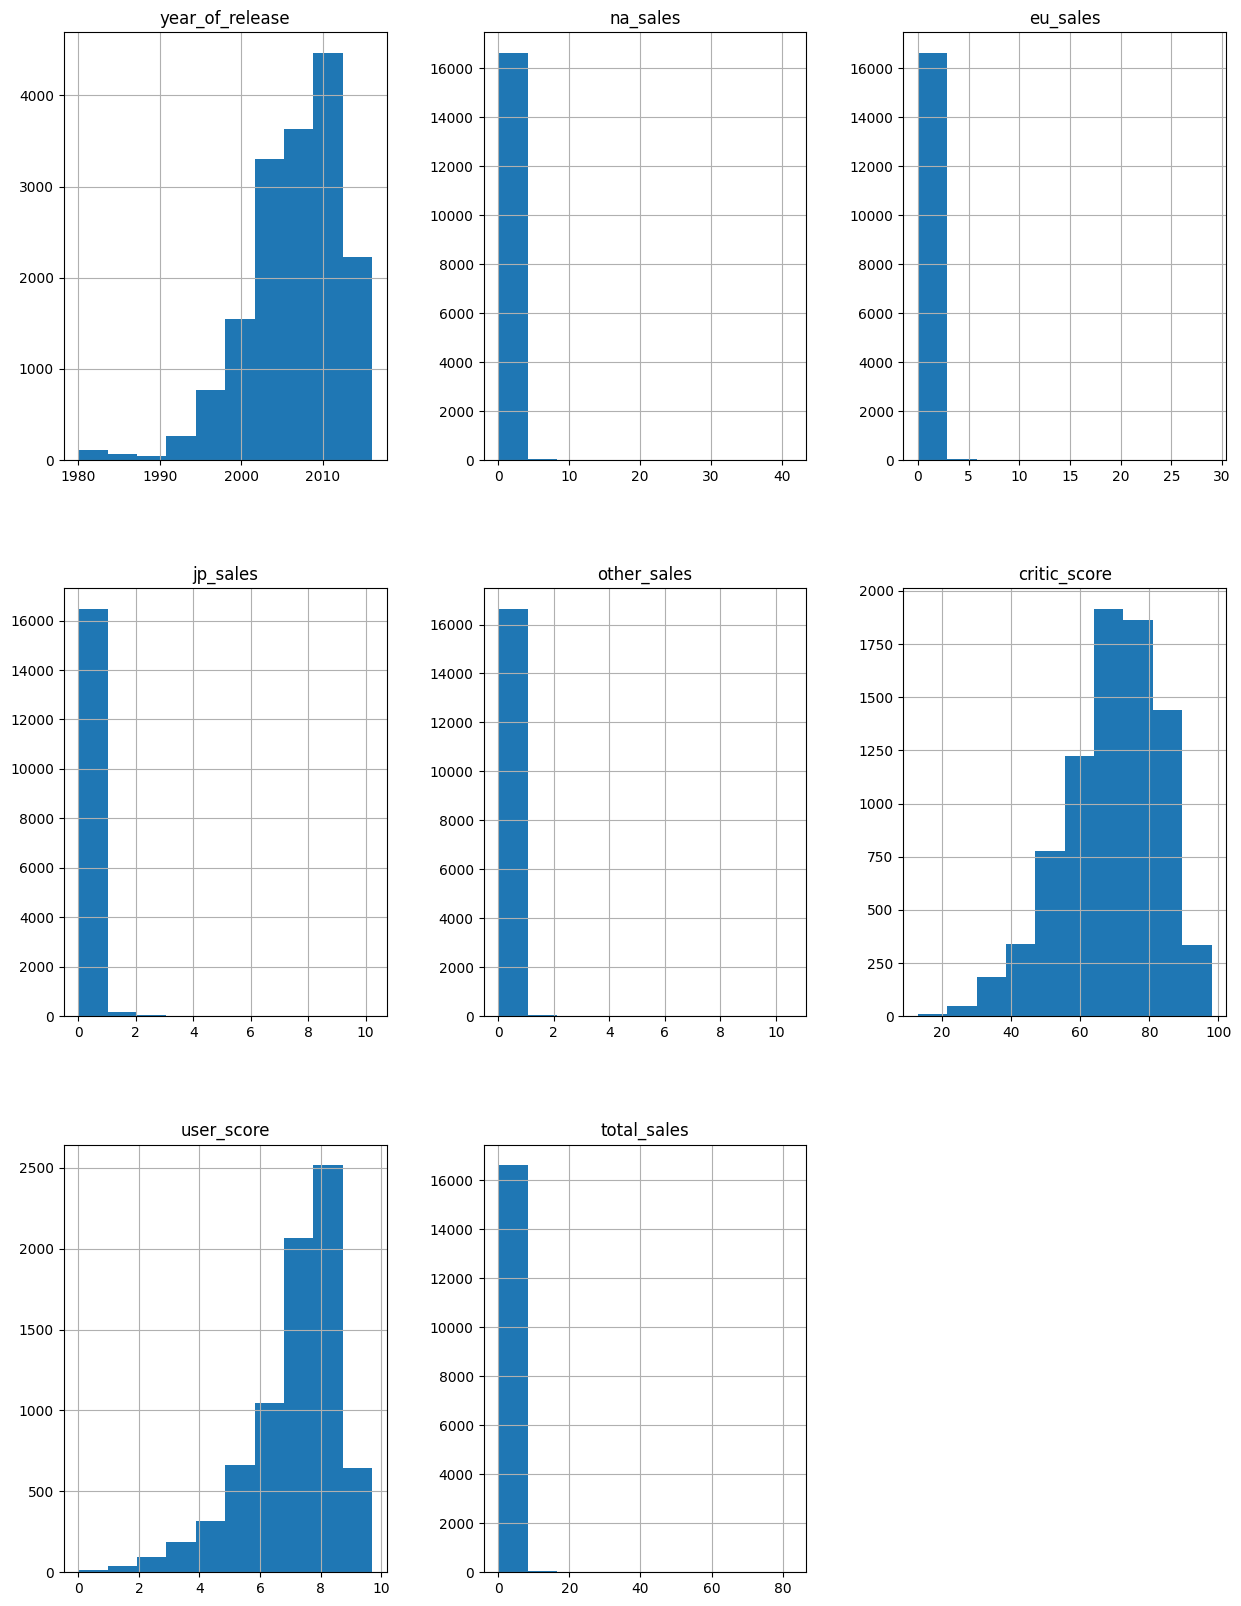

In [28]:
# После того как мы разобрались с пропусками и поменяли типы занчений в столбцах, Построим диаграммы для всех числовых столбцов таблицы
games.hist(figsize=(15, 20));

### Вывод: на этапе предобработки данных мы проверили наличие пропусков в таблицах, поменяли типы данных в столбцах, подробно изучили значения в столбце user_score, проверили данные на наличие дубликатов, добавили столбец с общими продажами по всем регионам.
### Мы обнаружили большое количество пропусков в столбцах genre, critic_score, user_score, rating.
### Так как мы не знаем предпочтения критиков , пользователей , то было решено оставить данные пропуски без изменений.
### Явных дубликатов обнаружено не было
### Неявные дубликаты были обнаружены и исправлены только в столбце rating.

## Проведем исследовательский анализ данных

##### Проанализируем сколько игр выпускалось в разные годы

In [29]:
# Посмотрим, какие года представлены в нашей таблице
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

In [30]:
# Сделаем сводную таблицу, в которой посчитаем количество игр за каждый год
games_by_year = games.pivot_table(index='year_of_release', values='name', aggfunc=['count']).reset_index()

In [31]:
games_by_year

,year_of_release,count
,,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15


**Очевидно, что до 1994 года выходило крайне мало игр, поэтому для построения графика не будем учитывать эти года.**

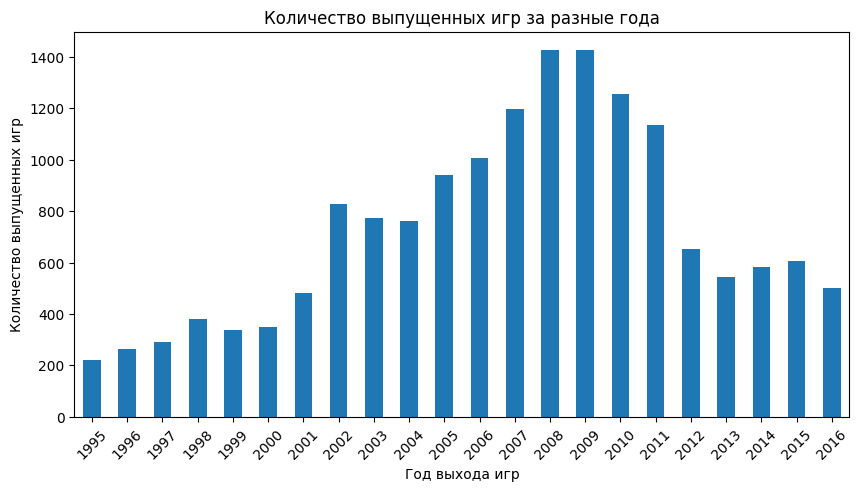

In [32]:
games[games['year_of_release'] > 1994].pivot_table(index='year_of_release', values='name', aggfunc=['count']).plot(
    grid=False, figsize=(10, 5), kind='bar', title='Количество выпущенных игр за разные года', rot=45, legend = None)
plt.xlabel("Год выхода игр")
plt.ylabel("Количество выпущенных игр")
plt.show()

In [33]:
games[games['year_of_release'] > 1994].pivot_table(index='year_of_release', values='name', aggfunc=['count'])

,count
,name
year_of_release,
1995,219
1996,263
1997,289
1998,379
1999,338
2000,350
2001,482
2002,829


**Вывод: После 2001 года наблюдается рост количества вышедших игр, больше всего игр выходило в 2008 - 2009 годах, после 2011 года наблюдается резкое снижение количества вышедших игр.**

##### Проанализируем как менялись продажи по платформам

In [35]:
# Сначала просто оценим распределеине данных по платформам и годам
platforms_by_all_years = games.pivot_table(index='year_of_release', 
                                           columns='platform', values='total_sales', aggfunc=['sum']).reset_index()

In [36]:
platforms_by_all_years

year_of_release    sum                                           \
platform                   2600   3DO    3DS    DC      DS     GB    GBA   
0                   1980  11.38   NaN    NaN   NaN     NaN    NaN    NaN   
1                   1981  35.68   NaN    NaN   NaN     NaN    NaN    NaN   
2                   1982  28.88   NaN    NaN   NaN     NaN    NaN    NaN   
3                   1983   5.84   NaN    NaN   NaN     NaN    NaN    NaN   
4                   1984   0.27   NaN    NaN   NaN     NaN    NaN    NaN   
5                   1985   0.45   NaN    NaN   NaN    0.02    NaN    NaN   
6                   1986   0.67   NaN    NaN   NaN     NaN    NaN    NaN   
7                   1987   1.94   NaN    NaN   NaN     NaN    NaN    NaN   
8                   1988   0.74   NaN    NaN   NaN     NaN   1.43    NaN   
9                   1989   0.63   NaN    NaN   NaN     NaN  64.97    NaN   
10                  1990    NaN   NaN    NaN   NaN     NaN   4.89    NaN   
11                  1991    NaN   NaN    NaN   NaN     NaN   5.57    NaN   
12                  1992    NaN   NaN    NaN   NaN     NaN  25.49    NaN   
13                  1993    NaN   NaN    NaN   NaN     NaN    NaN    NaN   
14                  1994    NaN  0.02    NaN   NaN     NaN  12.18    NaN   
15                  1995    NaN  0.08    NaN   NaN     NaN   3.60    NaN   
16                  1996    NaN   NaN    NaN   NaN     NaN  36.03    NaN   
17                  1997    NaN   NaN    NaN   NaN     NaN   6.37    NaN   
18                  1998    NaN   NaN    NaN  3.38     NaN  26.90    NaN   
19                  1999    NaN   NaN    NaN  5.16     NaN  38.00    NaN   
20                  2000    NaN   NaN    NaN  5.99     NaN  19.76   0.07   
21                  2001    NaN   NaN    NaN  1.07     NaN   9.24  61.53   
22                  2002    NaN   NaN    NaN  0.29     NaN    NaN  74.16   
23                  2003    NaN   NaN    NaN   NaN     NaN    NaN  56.67   
24                  2004    NaN   NaN    NaN   NaN   17.27    NaN  77.91   
25                  2005    NaN   NaN    NaN   NaN  130.14    NaN  33.86   
26                  2006    NaN   NaN    NaN   NaN  119.81    NaN   5.28   
27                  2007    NaN   NaN    NaN  0.02  146.94    NaN   3.40   
28                  2008    NaN   NaN    NaN  0.04  145.31    NaN    NaN   
29                  2009    NaN   NaN    NaN   NaN  119.54    NaN    NaN   
30                  2010    NaN   NaN    NaN   NaN   85.02    NaN    NaN   
31                  2011    NaN   NaN  63.20   NaN   26.18    NaN    NaN   
32                  2012    NaN   NaN  51.36   NaN   11.01    NaN    NaN   
33                  2013    NaN   NaN  56.57   NaN    1.54    NaN    NaN   
34                  2014    NaN   NaN  43.76   NaN     NaN    NaN    NaN   
35                  2015    NaN   NaN  27.78   NaN     NaN    NaN    NaN   
36                  2016    NaN   NaN  15.14   NaN     NaN    NaN    NaN   

                                                                               \
platform     GC    GEN    GG    N64    NES    NG     PC  PCFX      PS     PS2   
0           NaN    NaN   NaN    NaN    NaN   NaN    NaN   NaN     NaN     NaN   
1           NaN    NaN   NaN    NaN    NaN   NaN    NaN   NaN     NaN     NaN   
2           NaN    NaN   NaN    NaN    NaN   NaN    NaN   NaN     NaN     NaN   
3           NaN    NaN   NaN    NaN  10.96   NaN    NaN   NaN     NaN     NaN   
4           NaN    NaN   NaN    NaN  50.08   NaN    NaN   NaN     NaN     NaN   
5           NaN    NaN   NaN    NaN  53.44   NaN   0.04   NaN     NaN     NaN   
6           NaN    NaN   NaN    NaN  36.41   NaN    NaN   NaN     NaN     NaN   
7           NaN    NaN   NaN    NaN  19.76   NaN    NaN   NaN     NaN     NaN   
8           NaN    NaN   NaN    NaN  45.01   NaN   0.03   NaN     NaN     NaN   
9           NaN    NaN   NaN    NaN   7.85   NaN    NaN   NaN     NaN     NaN   
10          NaN   2.60   NaN    NaN  15.73   NaN    NaN   NaN     NaN   

**Вывод: таблица не самая информативная, но по ней видно, что платформы появляются и исчезают от 9 до 12 лет.
То есть можно сказать, что характерный срок "жизни платформы" составляет в среднем 10,5 лет.**

In [37]:
# Найдем платформы с самыми большими продажами
top_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc=['sum']).reset_index()

In [38]:
top_platforms.columns = ['platform', 'total_sales']

In [39]:
top_platforms.sort_values(by='total_sales', ascending=False)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [40]:
# Найдем суммарные продажи по всем платформам
top_platforms['total_sales'].sum()

8913.289999999954

In [41]:
# Составим список платформ-абсолютных лидеров по продажам (которые суммарно составляют порядка 60% всех продаж) 
list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [42]:
# Создадим таблицу, в которой будут только платформы-лидеры
best_platforms = games.loc[games['platform'].isin(list)]

In [43]:
best_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [44]:
# Создадим сводную таблицу в которой для каждой платформы будут видны продажи по годам
best_platforms_by_year = best_platforms.pivot_table(index='year_of_release', 
                                                    columns='platform', values='total_sales', aggfunc=['sum']).reset_index()

In [45]:
best_platforms_by_year

year_of_release     sum                                        
platform                      DS      PS     PS2     PS3     Wii    X360
0                   1985    0.02     NaN     NaN     NaN     NaN     NaN
1                   1994     NaN    6.03     NaN     NaN     NaN     NaN
2                   1995     NaN   35.96     NaN     NaN     NaN     NaN
3                   1996     NaN   94.70     NaN     NaN     NaN     NaN
4                   1997     NaN  136.17     NaN     NaN     NaN     NaN
5                   1998     NaN  169.49     NaN     NaN     NaN     NaN
6                   1999     NaN  144.53     NaN     NaN     NaN     NaN
7                   2000     NaN   96.37   39.17     NaN     NaN     NaN
8                   2001     NaN   35.59  166.43     NaN     NaN     NaN
9                   2002     NaN    6.67  205.38     NaN     NaN     NaN
10                  2003     NaN    2.07  184.31     NaN     NaN     NaN
11                  2004   17.27     NaN  211.81     NaN     NaN     NaN
12                  2005  130.14     NaN  160.66     NaN     NaN    8.25
13                  2006  119.81     NaN  103.42   20.96  137.15   51.62
14                  2007  146.94     NaN   75.99   73.19  152.77   95.41
15                  2008  145.31     NaN   53.90  118.52  171.32  135.26
16                  2009  119.54     NaN   26.40  130.93  206.97  120.29
17                  2010   85.02     NaN    5.64  142.17  127.95  170.03
18                  2011   26.18     NaN    0.45  156.78   59.65  143.84
19                  2012   11.01     NaN     NaN  107.36   21.71   99.74
20                  2013    1.54     NaN     NaN  113.25    8.59   88.58
21                  2014     NaN     NaN     NaN   47.76    3.75   34.74
22                  2015     NaN     NaN     NaN   16.82    1.14   11.96
23                  2016     NaN     NaN     NaN    3.60    0.18    1.52

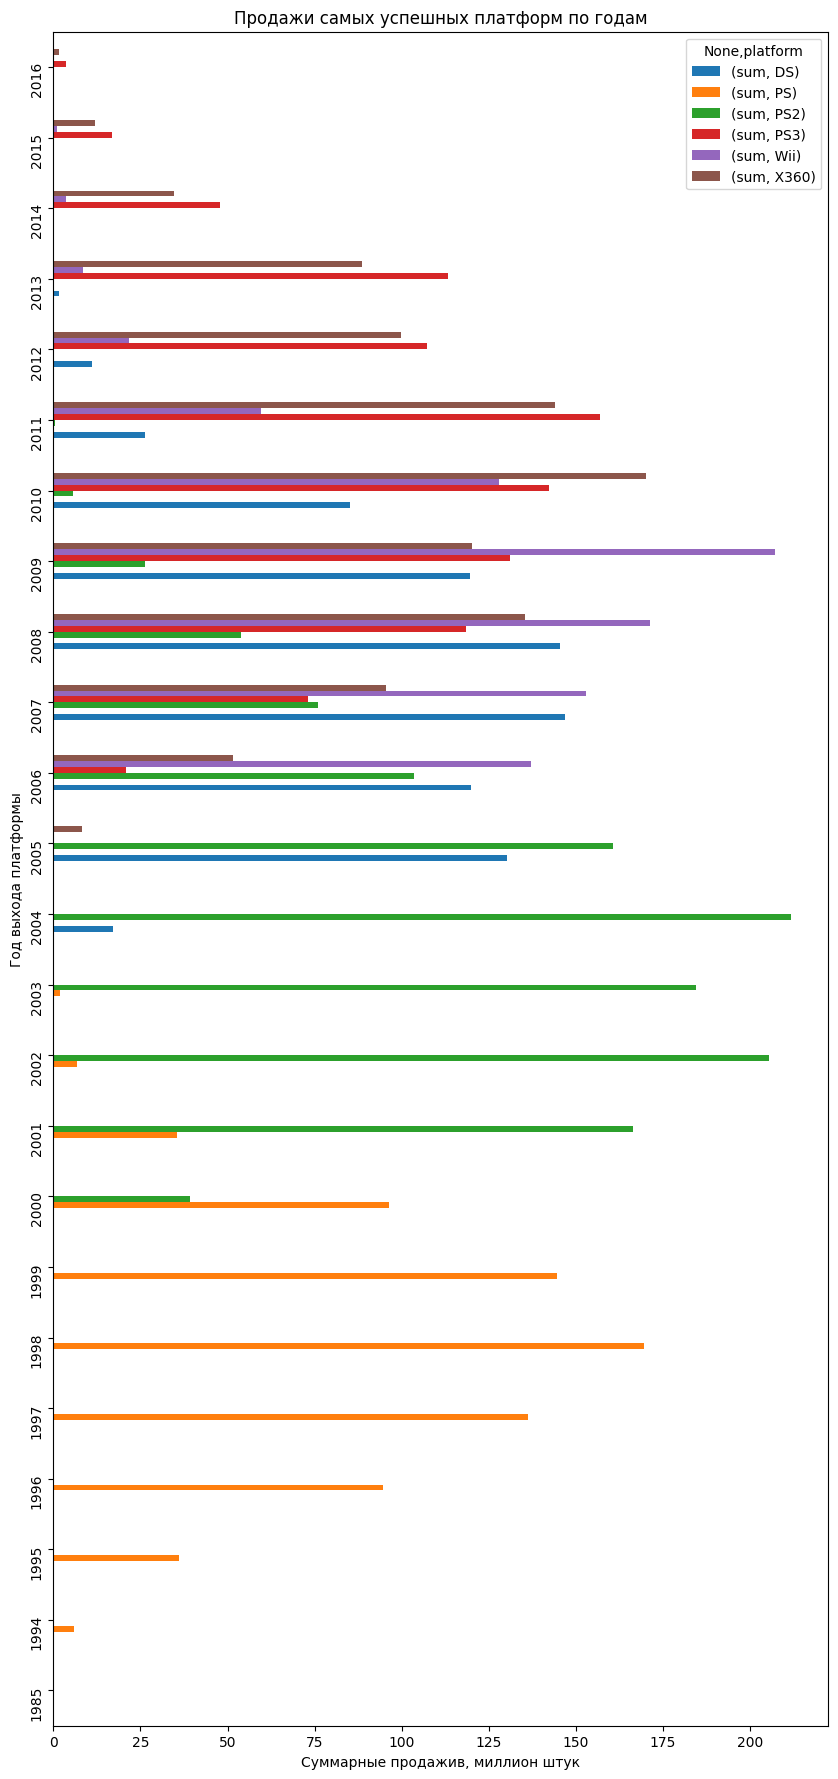

In [46]:
# Визуализируем полученные данные
best_platforms.pivot_table(index='year_of_release', 
                           columns='platform', 
                           values='total_sales', aggfunc=['sum']).plot(grid=False, 
                                                                       figsize=(10, 22), 
                                                                        kind='barh', rot=90,
                                                                        title='Продажи самых успешных платформ по годам')
plt.xlabel("Суммарные продажив, миллион штук")
plt.ylabel("Год выхода платформы")
plt.show()

**Вывод: аболютными лидерами по продажам за все время являются платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.
Также удалось установить, что платформы появляются и исчезают примерно за 10,5 лет.**

##### Определим актуальный период данных, на основе которых мы сможем в дальнейшем построить прогноз на 2017 год
Возьмем актуальный период, чтобы туда входило 2 полных года. Так как данные за 2016 неполные, то возьмем данные начиная с 2014 года включительно.

In [47]:
# Оставляем данные только за актуальный период
games_new = games[games['year_of_release'] > 2013]

In [48]:
games_new['year_of_release'].unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

In [49]:
# Проверим долю пропусков в таблице с актуальными данными
pd.DataFrame(round(games_new.isna().mean()*100, 2)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,57.490000
user_score,47.420000


##### Определим, какие платформы лидируют по продажам, также выделим наиболее потенциально прибыльные платформы

In [50]:
# Создадим сводную таблицу в которой для каждой платформы будут видны продажи по годам
new_best_platforms_by_year = games_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=['sum']).reset_index()

In [51]:
new_best_platforms_by_year

year_of_release    sum                                           \
platform                    3DS     PC    PS3     PS4   PSP    PSV   Wii   
0                   2014  43.76  13.28  47.76  100.00  0.24  11.90  3.75   
1                   2015  27.78   8.52  16.82  118.90  0.12   6.25  1.14   
2                   2016  15.14   5.25   3.60   69.25   NaN   4.25  0.18   

                               
platform   WiiU   X360   XOne  
0         22.03  34.74  54.07  
1         16.35  11.96  60.14  
2          4.60   1.52  26.15

In [52]:
new_best_platforms_by_year.columns = ['year_of_release', '3DS_sales', 'PC_sales', 'PS3_sales', 'PS4_sales', 'PSP_sales', 'PSV_sales', 'Wii_sales', 'WiiU_sales', 'X360_sales', 'XOne_sales']

In [53]:
new_best_platforms_by_year

,year_of_release,3DS_sales,PC_sales,PS3_sales,PS4_sales,PSP_sales,PSV_sales,Wii_sales,WiiU_sales,X360_sales,XOne_sales
0,2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


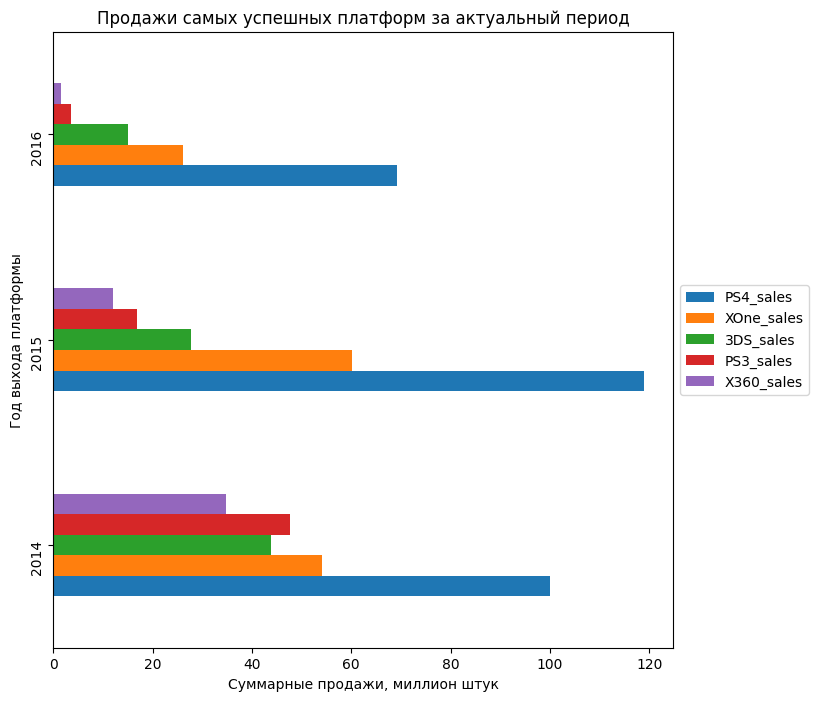

In [136]:
# Визуализируем полученные данные, на графике оставим только топ-5 платформ с лучшими продажами
new_best_platforms_by_year[['year_of_release', 'PS4_sales', 'XOne_sales', '3DS_sales', 'PS3_sales', 'X360_sales']].\
plot(x='year_of_release', 
     grid=False, figsize=(8, 8), kind='barh', rot=90, title='Продажи самых успешных платформ за актуальный период')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.xlabel("Суммарные продажи, миллион штук")
plt.ylabel("Год выхода платформы")
plt.show()

**Вывод: абсолютным лидером по продажам за актуальный период является платформа PS4.
При этом продажи всех платформ кроме XOne и PS4 падают.
Соответственно, платформы XOne и PS4 - наиболее потенциально прибыльные платформы.**

##### Построим график "Ящик с усами" для общих продаж в зависимости от платформы

(0.0, 2.0)

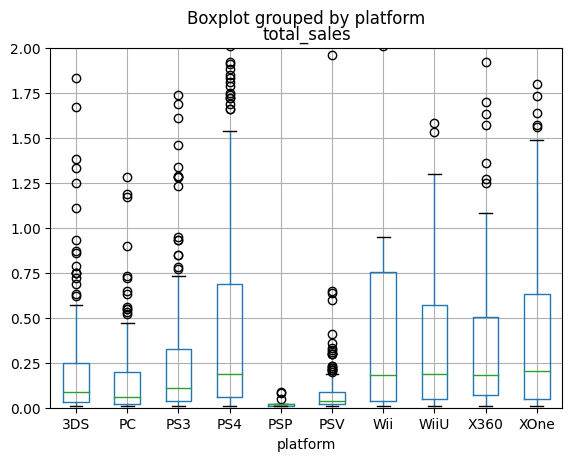

In [55]:
games_new.boxplot(column=['total_sales'], by='platform', grid= True) 
plt.ylim(0, 2)

**Вывод: По графикам видно наибольший размах продажах (без учета выбросов) имеют платформы PS3, PS4, X360, XOne.
Медианное значение продаж для этих платформ составляет примерно 250 000 штук. Это на мой взгляд подтверждает утверждение , что на платформы PS4, XOne необходимо будет делать ставку в 2017 году.
Также видно, что платформы 3DS, DS, PC, PS2, PSP, PSV имеют очень низкое медианное значение продаж, что на мой взгляд говорит о том, что нет смысла делать ставку на эти платформы.**

##### Для платформы PS3 проверим, как вляют на продажи отзывы пользователей и критиков

In [56]:
# Соберем все нужные столбцы, которые понадобятся для построения матрицы рассеяния в одну переменную
games_scatter = games_new[['platform', 'total_sales', 'user_score', 'critic_score']]

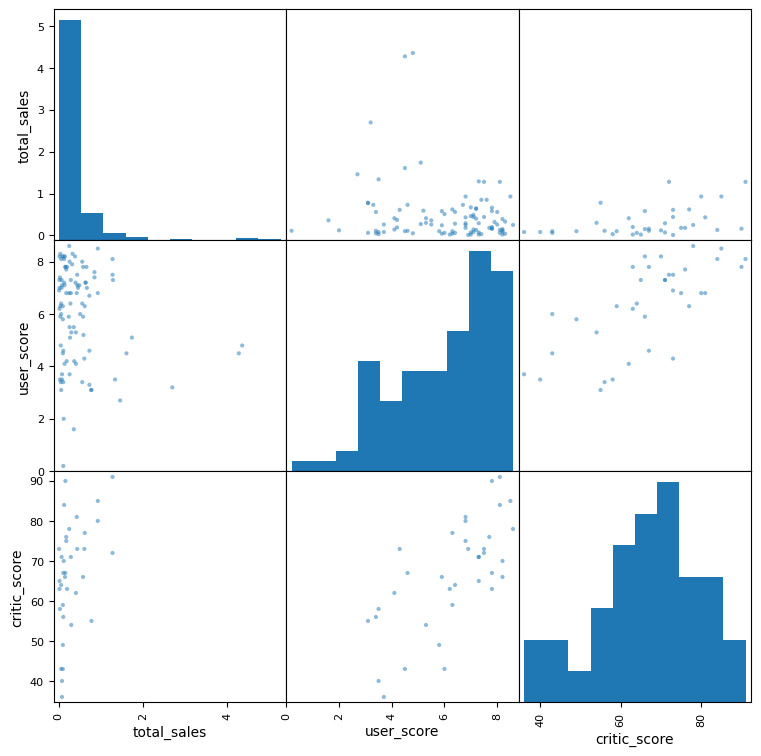

In [138]:
# Построим матрицу рассеяния
pd.plotting.scatter_matrix(games_scatter[games_scatter['platform'] == 'PS3'], figsize=(9,9))
plt.show()

In [139]:
games_scatter.loc[games_scatter['platform'] == 'PS3', 'total_sales'].\
corr(games_scatter.loc[games_scatter['platform'] == 'PS3', 'user_score'])

-0.16676141347662116

In [59]:
games_scatter.loc[games_scatter['platform'] == 'PS3', 'total_sales'].\
corr(games_scatter.loc[games_scatter['platform'] == 'PS3', 'critic_score'])

0.4465746049319071

**Вывод: при анализе платформы PS3 не удалось обнаружить связи между продажами и оценкой пользователей, также не удалось обнаружить связь между продажами и оценкой критиков.**

**Также необходимо заметить, что у нас большое количество пропусков в столбцах с оценками. Если бы пропусков было меньше, то вывод мог быть другим.**

##### Для остальных платформ проверим, как вляют на продажи отзывы пользователей и критиков
Для этого для каждой платформы рассчитаем коэффициент корреляции между продажами и оценкой пользователя и коэффициент корреляции между продажами и оценкой критика.

In [60]:
games_scatter['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [61]:
# Создадим список с названиями платформ
array = ['X360', 'DS', 'PS4', '3DS', 'Wii', 'XOne', 'WiiU', 'PC','PSP', 'PSV', 'PS2']

In [140]:
# Для каждой платформы рассчитаем коэффициенты корреляции
for i in array:
    correlation_1 = games_scatter.loc[games_scatter['platform'] == i, 'total_sales'].\
    corr(games_scatter.loc[games_scatter['platform'] == i, 'user_score'])
    
    correlation_2 = games_scatter.loc[games_scatter['platform'] == i, 'total_sales'].\
    corr(games_scatter.loc[games_scatter['platform'] == i, 'critic_score'])
    
    print(f'у платформы {i} коэффициент корреляции между продажами и оценкой пользователя равен {correlation_1}')
    print(f'у платформы {i} коэффициент корреляции между продажами и оценкой критика равен {correlation_2}')

у платформы X360 коэффициент корреляции между продажами и оценкой пользователя равен -0.138444570945665
у платформы X360 коэффициент корреляции между продажами и оценкой критика равен 0.5257228356581523
у платформы DS коэффициент корреляции между продажами и оценкой пользователя равен nan
у платформы DS коэффициент корреляции между продажами и оценкой критика равен nan
у платформы PS4 коэффициент корреляции между продажами и оценкой пользователя равен -0.0401315894726973
у платформы PS4 коэффициент корреляции между продажами и оценкой критика равен 0.402661410681041
у платформы 3DS коэффициент корреляции между продажами и оценкой пользователя равен 0.21519327185270273
у платформы 3DS коэффициент корреляции между продажами и оценкой критика равен 0.31411749286905105
у платформы Wii коэффициент корреляции между продажами и оценкой пользователя равен 1.0
у платформы Wii коэффициент корреляции между продажами и оценкой критика равен nan
у платформы XOne коэффициент корреляции между продажа

**Вывод: при анализе остальных платформ также не удалось обнаружить связи между продажами и оценкой пользователей, также не удалось обнаружить связь между продажами и оценкой критиков.**

**Также необходимо заметить, что у нас большое количество пропусков в столбцах с оценками. Если бы пропусков было меньше, то вывод мог быть другим.**

##### Проверим, какие жанры являются самыми прибыльными

In [63]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [64]:
games_by_genre = games_new.pivot_table(index='genre', values='total_sales', aggfunc=['median', 'count']).reset_index()

In [65]:
games_by_genre

,genre,median,count
,,total_sales,total_sales
0,Action,0.090,619
1,Adventure,0.030,185
2,Fighting,0.125,60
3,Misc,0.090,113
4,Platform,0.140,38
5,Puzzle,0.045,14
6,Racing,0.090,69
7,Role-Playing,0.110,221
8,Shooter,0.515,128


In [66]:
games_by_genre.columns = ['genre', 'median_sales', 'count']

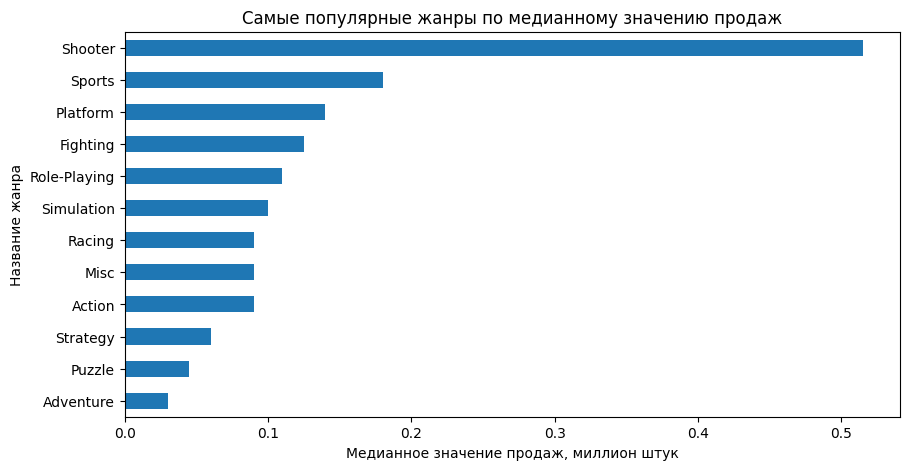

In [141]:
games_by_genre.sort_values(by='median_sales', ascending=True).\
plot(x='genre', y='median_sales', grid=False, figsize=(10, 5), kind='barh', rot=0, legend = None,
     title='Самые популярные жанры по медианному значению продаж')
plt.xlabel("Медианное значение продаж, миллион штук")
plt.ylabel("Название жанра")
plt.show()

**Вывод: По графику видно, что самый популярный с отрывом жанр это Shooter, на втором месте Sports, наименее популярные - Adventure и Puzzle.** 

### Вывод по исследовательскому анализу: на данном этапе проекта мы исследовали данные и определяли актуальный период данных, на основе которого мы будем строить прогноз на 2017 год.
### Нам удалось установить следующее:
1. Больше всего игр выходило в 2008 - 2009 годах, после 2011 года наблюдается резкое снижение количества вышедших игр.
2. Аболютными лидерами по продажам за все время являются платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.
   Также удалось установить, что платформы появляются и исчезают примерно за 10,5 лет.
3. За актуальный период мы договорились принять данные с 2014 по 2016 год включительно.
4. Платформы XOne и PS4 - наиболее потенциально прибыльные платформы и лидеры по продажам за актуальный период. 
5. Не удалось обнаружить связи между продажами и оценкой пользователей, также не удалось обнаружить связь между продажами и оценкой критиков.
   Отдельно необходимо отметить, что на такой вывод могло повлиять большое количество пропусков в столбцах с оценками пользователей и критиков. Если бы пропусков было меньше, то вывод мог быть другим.
6. Самые популярные жанры это Shooter и Sports, наименее популярные - Adventure и Puzzle.

## Составим портрет пользователя каждого региона (NA, EU, JP)

#### Определим самые популярные платформы для каждого региона

##### Определим самые популярные платформы для Северной Америки

In [68]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [69]:
# Создадим сводную таблицу по платформам и продажам в Северной Америке
games_na = games_new.pivot_table(index='platform', values='na_sales', aggfunc=['sum'])

In [70]:
games_na

,sum
,na_sales
platform,
3DS,22.64
PC,7.23
PS3,22.05
PS4,98.61
PSP,0.00
PSV,2.52
Wii,2.08
WiiU,19.36


In [71]:
games_na.columns = ['na_sales']

In [72]:
# Добавим в таблицу столбец с долей каждой платформы в общих продажах
games_na['sales_percentage'] = games_na['na_sales'] / (games_na['na_sales'].sum())

In [73]:
games_na

,na_sales,sales_percentage
platform,,
3DS,22.64,0.079701
PC,7.23,0.025452
PS3,22.05,0.077624
PS4,98.61,0.347145
PSP,0.00,0.000000
PSV,2.52,0.008871
Wii,2.08,0.007322
WiiU,19.36,0.068155
X360,28.30,0.099627


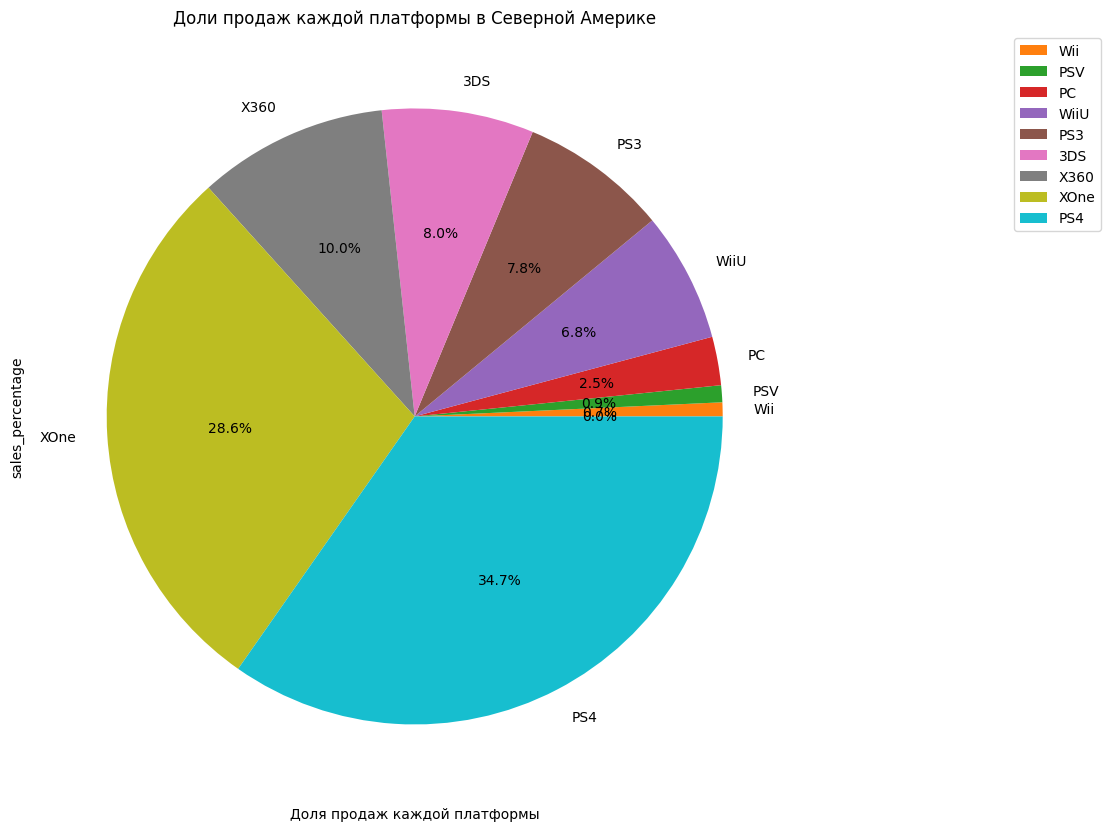

In [74]:
# Визуализируем полученные данные
games_na.sort_values(by='sales_percentage', ascending=True).\
plot(x='platform', y='sales_percentage', 
     grid=False, figsize=(20, 10), kind='pie', rot=0, autopct='%.1f%%', title='Доли продаж каждой платформы в Северной Америке')
plt.xlabel("Доля продаж каждой платформы")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

**Вывод: По графику видно, что в топ-5 самых популярных платформ за актуальный период в Северной Америке входят PS4, XOne, X360, 3DS, PS3.** 

##### Определим самые популярные платформы для Европы

In [75]:
# Создадим сводную таблицу по платформам и продажам в Европе
games_eu = games_new.pivot_table(index='platform', values='eu_sales', aggfunc=['sum'])

In [76]:
games_eu.columns = ['eu_sales']

In [77]:
# Добавим в таблицу столбец с долей каждой платформы в общих продажах
games_eu['sales_percentage'] = games_eu['eu_sales'] / (games_eu['eu_sales'].sum())

In [78]:
games_eu

,eu_sales,sales_percentage
platform,,
3DS,16.12,0.059554
PC,17.97,0.066388
PS3,25.54,0.094355
PS4,130.04,0.480420
PSP,0.00,0.000000
PSV,3.53,0.013041
Wii,2.59,0.009568
WiiU,13.15,0.048581
X360,15.49,0.057226


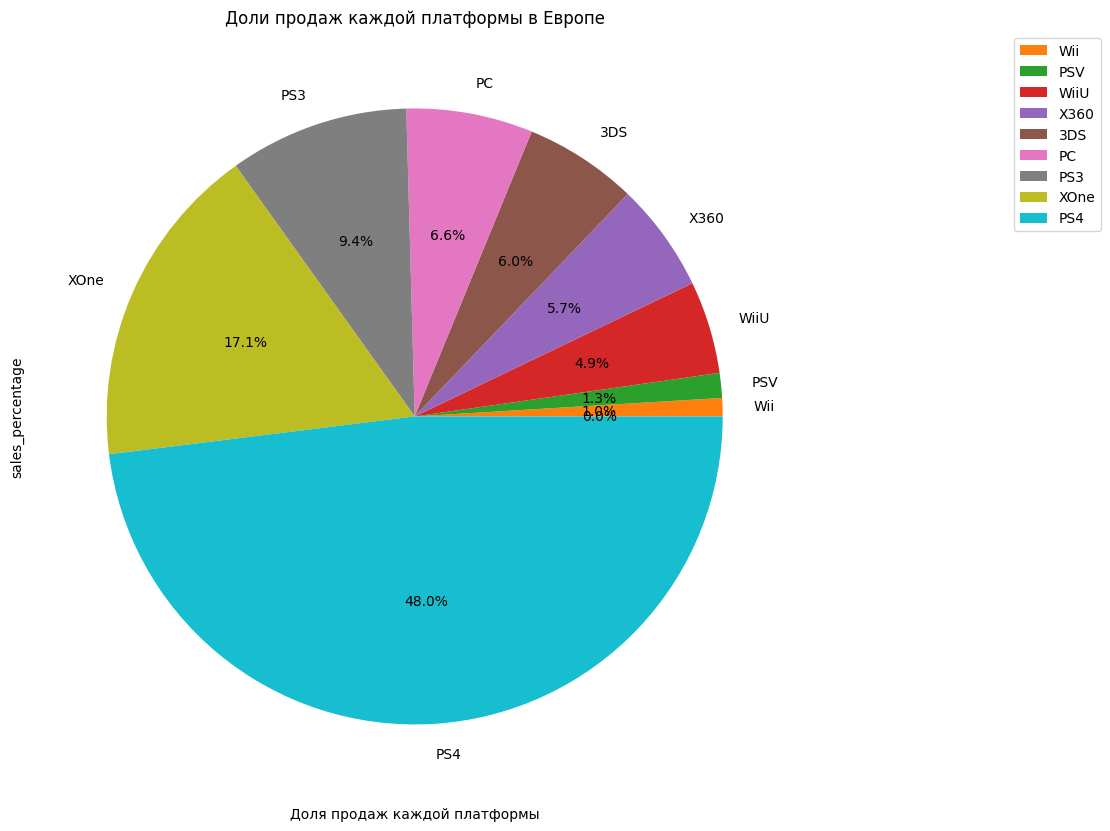

In [79]:
# Визуализируем полученные данные
games_eu.sort_values(by='sales_percentage', ascending=True).\
plot(x='platform', y='sales_percentage', 
     grid=False, figsize=(15, 10), kind='pie', rot=0, autopct='%.1f%%', title='Доли продаж каждой платформы в Европе')
plt.xlabel("Доля продаж каждой платформы")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

**Вывод: По графику видно, что в топ-5 самых популярных платформ за актуальный период в Европе входят PS4, XOne, PS3, PC, 3DS.**

##### Определим самые популярные платформы для Японии

In [147]:
# Создадим сводную таблицу по платформам и продажам в Японии
games_jp = games_new.pivot_table(index='platform', values='jp_sales', aggfunc=['sum']).reset_index()
games_jp

,platform,sum
,,jp_sales
0,3DS,44.24
1,PC,0.00
2,PS3,11.22
3,PS4,15.02
4,PSP,0.36
5,PSV,14.54
6,Wii,0.00
7,WiiU,7.31
8,X360,0.08


In [148]:
games_jp.columns = ['platform', 'jp_sales']

In [149]:
# Добавим в таблицу столбец с долей каждой платформы в общих продажах
games_jp['sales_percentage'] = games_jp['jp_sales'] / (games_jp['jp_sales'].sum())

In [150]:
games_jp

,platform,jp_sales,sales_percentage
0,3DS,44.24,0.475239
1,PC,0.00,0.000000
2,PS3,11.22,0.120529
3,PS4,15.02,0.161349
4,PSP,0.36,0.003867
5,PSV,14.54,0.156193
6,Wii,0.00,0.000000
7,WiiU,7.31,0.078526
8,X360,0.08,0.000859
9,XOne,0.32,0.003438


In [151]:
games_jp.loc[ len(games_jp.index )] = ['other', 0, 0.008164]

In [152]:
games_jp = games_jp.query('sales_percentage > 0.008')

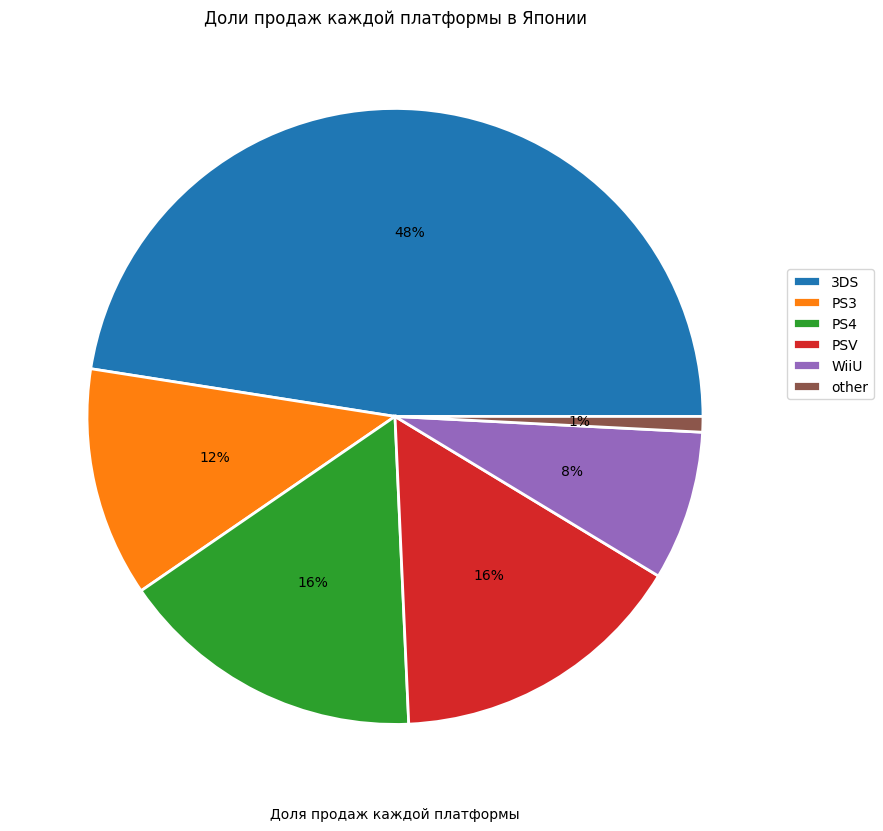

In [157]:
values= games_jp['sales_percentage']
keys = games_jp['platform']
fig, ax = plt.subplots(figsize=(20, 10))
plt.pie(values, 
        labels=keys, 
        labeldistance=None, 
        autopct='%.0f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.legend()
plt.legend(bbox_to_anchor=(1, 0.7))
plt.title('Доли продаж каждой платформы в Японии')
plt.xlabel("Доля продаж каждой платформы")
plt.show();

**Вывод: По графику видно, что в топ-5 самых популярных платформ за актуальный период в Японии входят 3DS, PS4, PSV, PS3, WiiU.**

#### Определим самые популярные жанры для каждого региона

##### Определим самые популярные жанры для Северной Америки

In [86]:
# Создадим сводную таблицу по жанрам и продажам в Северной Америке
genre_na = games_new.pivot_table(index='genre', values='na_sales', aggfunc=['sum']).reset_index()

In [87]:
genre_na

,genre,sum
,,na_sales
0,Action,72.53
1,Adventure,5.64
2,Fighting,12.43
3,Misc,15.05
4,Platform,6.79
5,Puzzle,0.65
6,Racing,8.74
7,Role-Playing,33.47
8,Shooter,79.02


In [88]:
genre_na.columns = ['genre', 'na_sales']

In [89]:
genre_na.sort_values(by='na_sales', ascending=False)

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05
2,Fighting,12.43
6,Racing,8.74
4,Platform,6.79
1,Adventure,5.64
9,Simulation,2.63


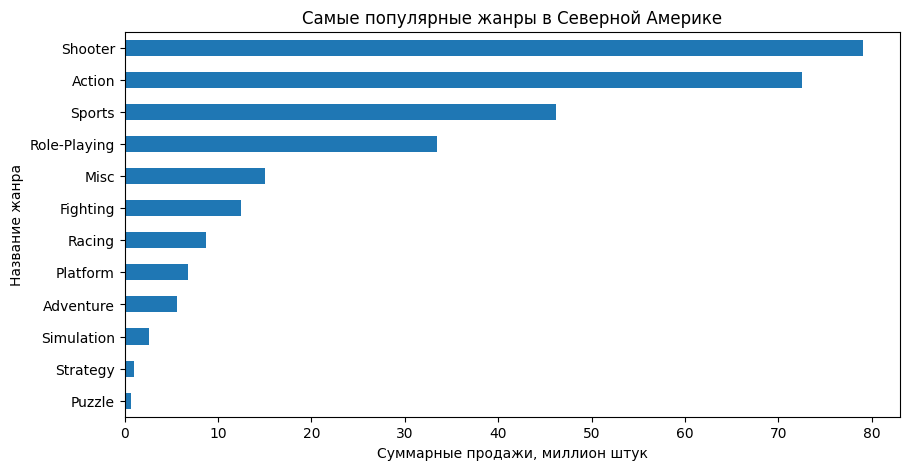

In [90]:
# Визуализируем полученные данные
genre_na.sort_values(by='na_sales', ascending=True).plot(x='genre', y='na_sales', 
                                                         grid=False, figsize=(10, 5), 
                                                         kind='barh', rot=0, legend = None, 
                                                         title='Самые популярные жанры в Северной Америке')
plt.xlabel("Суммарные продажи, миллион штук")
plt.ylabel("Название жанра")
plt.show()

**Вывод: По графику видно, что в топ-5 самых популярных жанров за актуальный период в Северной Америке входят Action , Shooter, Sports. Misc, Role-Playing.**

##### Определим самые популярные жанры для Европы

In [91]:
# Создадим сводную таблицу по жанрам и продажам в Европе
genre_eu = games_new.pivot_table(index='genre', values='eu_sales', aggfunc=['sum']).reset_index()

In [92]:
genre_eu.columns = ['genre', 'eu_sales']

In [93]:
genre_eu.sort_values(by='eu_sales', ascending=False)

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13
3,Misc,12.86
9,Simulation,7.30
4,Platform,6.80
2,Fighting,6.69
1,Adventure,6.49


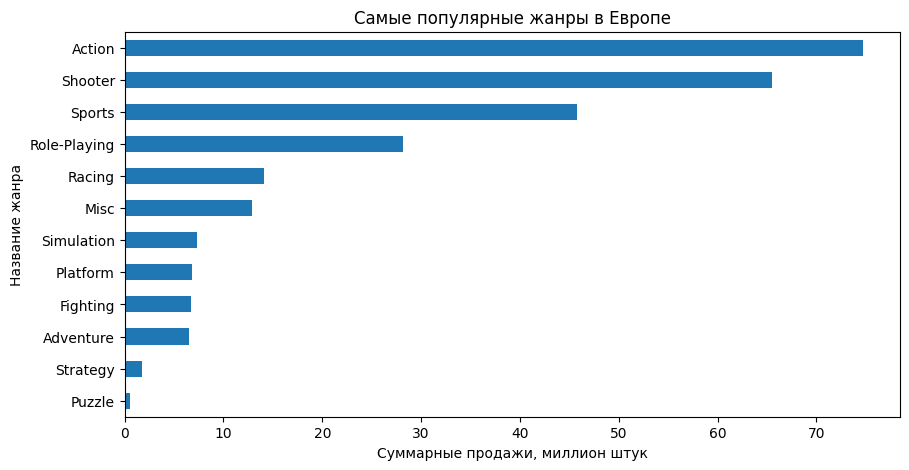

In [94]:
# Визуализируем полученные данные
genre_eu.sort_values(by='eu_sales', ascending=True).plot(x='genre', y='eu_sales', 
                                                         grid=False, figsize=(10, 5), 
                                                         kind='barh', rot=0, legend = None, 
                                                         title='Самые популярные жанры в Европе')
plt.xlabel("Суммарные продажи, миллион штук")
plt.ylabel("Название жанра")
plt.show()

**Вывод: По графику видно, что в топ-5 самых популярных жанров за актуальный период в Европе входят Action , Shooter, Sports, Role-Playing, Racing.**

##### Определим самые популярные жанры для Японии

In [95]:
# Создадим сводную таблицу по жанрам и продажам в Японии
genre_jp = games_new.pivot_table(index='genre', values='jp_sales', aggfunc=['sum']).reset_index()

In [96]:
genre_jp.columns = ['genre', 'jp_sales']

In [97]:
genre_jp.sort_values(by='jp_sales', ascending=False)

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87
1,Adventure,3.60
10,Sports,3.26
4,Platform,2.69
9,Simulation,2.31
6,Racing,1.76


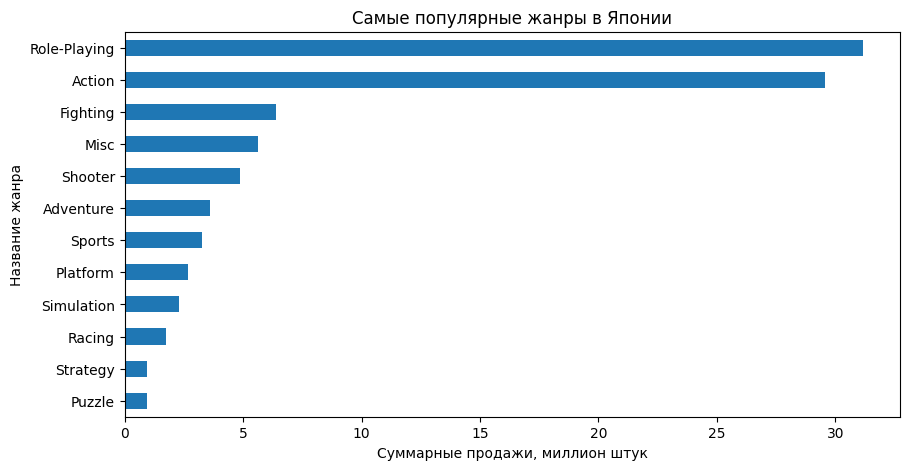

In [98]:
# Визуализируем полученные данные
genre_jp.sort_values(by='jp_sales', ascending=True).plot(x='genre', y='jp_sales', 
                                                         grid=False, figsize=(10, 5), 
                                                         kind='barh', rot=0, legend = None, 
                                                         title='Самые популярные жанры в Японии')
plt.xlabel("Суммарные продажи, миллион штук")
plt.ylabel("Название жанра")
plt.show()

**Вывод: По графику видно, что в топ-5 самых популярных жанров за актуальный период в Японии входят Role-Playing, Action, Fighting, Misc, Shooter.**

In [99]:
# Для удобства сведем все данные на один график
all_regions = games_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['sum'])

In [100]:
all_regions

sum                  
             eu_sales jp_sales na_sales
genre                                  
Action          74.68    29.58    72.53
Adventure        6.49     3.60     5.64
Fighting         6.69     6.37    12.43
Misc            12.86     5.61    15.05
Platform         6.80     2.69     6.79
Puzzle           0.52     0.93     0.65
Racing          14.13     1.76     8.74
Role-Playing    28.17    31.16    33.47
Shooter         65.52     4.87    79.02
Simulation       7.30     2.31     2.63
Sports          45.73     3.26    46.13
Strategy         1.79     0.95     0.98

In [101]:
all_regions.columns=['eu_sales', 'jp_sales', 'na_sales']

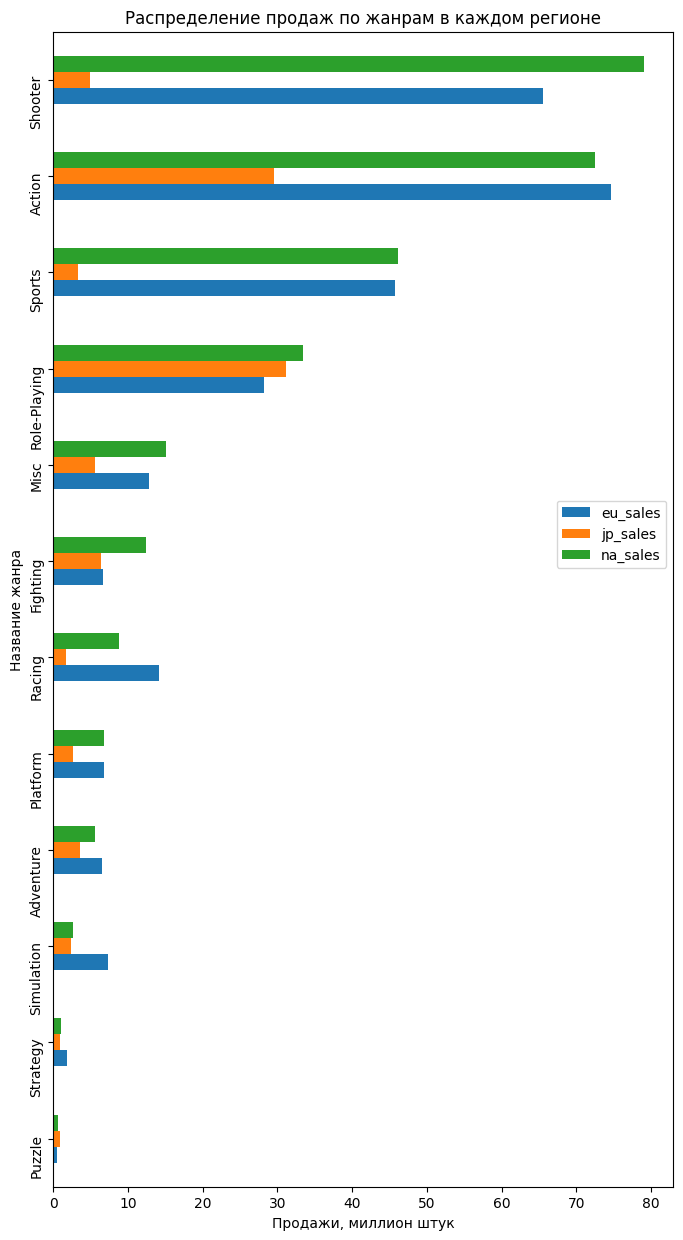

In [102]:
all_regions.sort_values(by='na_sales', ascending=True).plot(grid=False, figsize=(8, 15), kind='barh', rot=90, title='Распределение продаж по жанрам в каждом регионе')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.xlabel("Продажи, миллион штук")
plt.ylabel("Название жанра")
plt.show()

**Вывод: по графику видно, что пользователи из Северной Америки и Европы предпочитают одни и те же жанры, а пользователи из Японии скорее другие.**
**Также график показывает, что продажи в Европе и Северной Америке значительно превосходят продажи в Японии.** 

#### Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе

##### Проверим, влияет ли рейтинг ESRB на продажи в Северной Америке

In [103]:
# Создадим сводную таблицу с рейтингом ESRB и средними продажами
esrb_na = games_new.pivot_table(index='rating', values='na_sales', aggfunc=['mean', 'count']).reset_index()

In [104]:
esrb_na

,rating,mean,count
,,na_sales,na_sales
0,E,0.231689,219
1,E10+,0.179622,185
2,M,0.363849,265
3,T,0.143727,271


In [105]:
esrb_na.columns = ['rating', 'mean_na_sales', 'count']

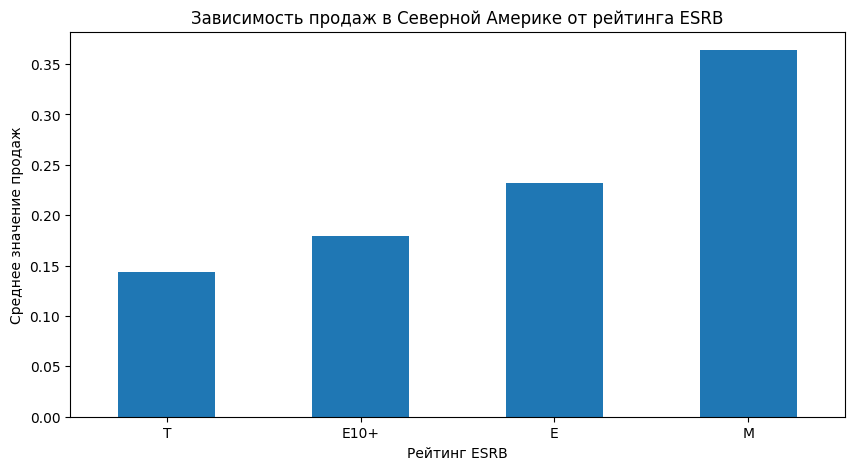

In [106]:
# Визуализируем полученные данные
esrb_na.sort_values(by='mean_na_sales', ascending=True).plot(x='rating', y='mean_na_sales', 
                                                             grid=False, figsize=(10, 5), 
                                                             kind='bar', rot=0, legend = None, 
                                                             title='Зависимость продаж в Северной Америке от рейтинга ESRB')
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Среднее значение продаж")
plt.show()

**Вывод: рейтинг ESRB оказывает влияние на продажи в Северной Америке.**
**Категория М наиболее популярна (что логично), категории Е, Е10+, Т значительно отстают по популярности.**
**При этом для категорий рейтинга EC и RP нельзя сделать вывод, так как они практически не представлены в выборке.**

**Также необходимо заметить, что у нас большое количество пропусков в столбцах с рейтингом ESRB. Если бы пропусков было меньше, то вывод мог быть другим.**

##### Проверим, влияет ли рейтинг ESRB на продажи в Европе

In [107]:
# Создадим сводную таблицу с рейтингом ESRB и средними продажами
esrb_eu = games_new.pivot_table(index='rating', values='eu_sales', aggfunc=['mean', 'count']).reset_index()

In [108]:
esrb_eu.columns = ['rating', 'mean_eu_sales', 'count']

In [109]:
esrb_eu

,rating,mean_eu_sales,count
0,E,0.265114,219
1,E10+,0.141405,185
2,M,0.352604,265
3,T,0.125720,271


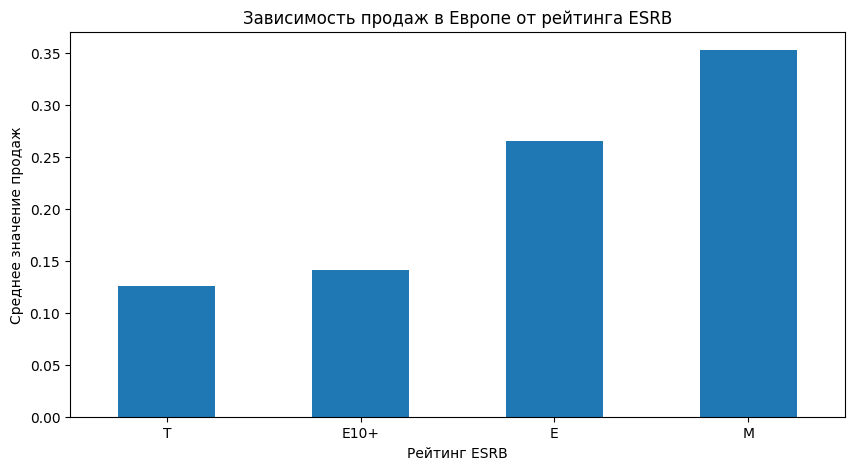

In [110]:
# Визуализируем полученные данные
esrb_eu.sort_values(by='mean_eu_sales', ascending=True).plot(x='rating', y='mean_eu_sales', 
                                                             grid=False, figsize=(10, 5), 
                                                             kind='bar', rot=0, legend = None, 
                                                             title='Зависимость продаж в Европе от рейтинга ESRB')
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Среднее значение продаж")
plt.show()

**Вывод: рейтинг ESRB оказывает влияние на продажи в Европе.**
**Категория М наиболее популярна (что логично), категории Е, Е10+, Т значительно отстают по популярности.**
**При этом для категорий рейтинга EC и RP нельзя сделать вывод, так как они практически не представлены в выборке.**

**Также необходимо заметить, что у нас большое количество пропусков в столбцах с рейтингом ESRB. Если бы пропусков было меньше, то вывод мог быть другим.**

##### Проверим, влияет ли рейтинг ESRB на продажи в Японии

In [111]:
# Создадим сводную таблицу с рейтингом ESRB и средними продажами
esrb_jp = games_new.pivot_table(index='rating', values='jp_sales', aggfunc=['mean', 'count']).reset_index()

In [112]:
esrb_jp.columns = ['rating', 'mean_jp_sales', 'count']

In [113]:
esrb_jp

,rating,mean_jp_sales,count
0,E,0.040822,219
1,E10+,0.024108,185
2,M,0.030226,265
3,T,0.054539,271


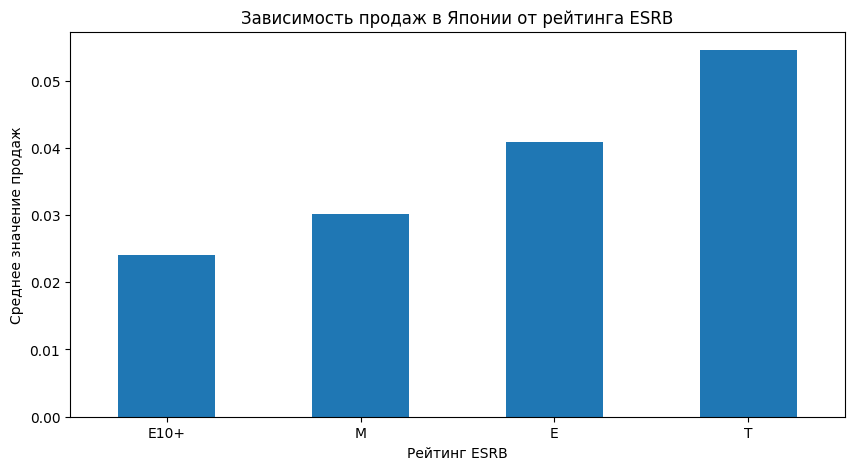

In [114]:
# Визуализируем полученные данные
esrb_jp.sort_values(by='mean_jp_sales', ascending=True).plot(x='rating', y='mean_jp_sales', 
                                                             grid=False, figsize=(10, 5), kind='bar', rot=0,
                                                             legend = None, 
                                                             title='Зависимость продаж в Японии от рейтинга ESRB')
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Среднее значение продаж")
plt.show()

**Вывод: рейтинг ESRB оказывает влияние на продажи в Японии.**
**Категории Т и Е наиболее популярны (что логично), категория Е10+ значительно отстает по популярности.**
**Категория М достаточно популярна, но уступает лидерам.**
**При этом для категорий рейтинга EC и RP нельзя сделать вывод, так как они практически не представлены в выборке.**

**Также необходимо заметить, что у нас большое количество пропусков в столбцах с рейтингом ESRB. Если бы пропусков было меньше, то вывод мог быть другим.**

### Вывод по портретам пользователей: на данном этапе проекта мы пытались определить предпочтения пользователей из каждого региона.
### Нам удалось установить следующее:
1. Пользователи из Северной Америки и Европы в целом предпочитают одни и те же платформы, в то время как предпочтения пользователей из Японии достаточно сильно отличаются. Однако, надо заметить, что платформа PS4 популярна во всех регионах.
   Самые популярные платформы у пользователей из Северной Америки и Европы PS4 и XOne, из Японии - 3DS и PS4.
2. Пользователи из Северной Америки и Европы предпочитают одни и те же жанры, а пользователи из Японии скорее другие.
   Самые популярные жанры у пользователей из Северной Америки и Европы это Action, Shooter, Sports, из Японии - Role-Playing, Action, Fighting.
   При этом надо отметить, что жанр Action популярен во всех регионах.
3. Рейтинг ESRB оказывает влияние на продажи в каждом регионе. В Северной Америке и Европе наиболее популярны игры с рейтингом М, а в Японии с рейтингом T.
   На оценку данного параметра повлияло большое количество пропусков в столбце с рейтингом ESRB. Если бы пропусков было меньше, то вывод мог быть другим.
4. Продажи игр в Северной Америке и Европе значительно превышают продажи игр в Японии.

 ## Проверка гипотез

##### Проверим гипотезу о равенстве средних пользовательских рейтингов платформ XboxOne и PC

In [115]:
# Сначала вспомним, какие значения есть в столбце user_score
games_new['user_score'].unique()

array([nan, 8.3, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.1, 6.4, 3.4,
       8.5, 4.8, 4.9, 4.5, 6.2, 8.4, 6.3, 7.7, 9.2, 7.6, 8.7, 6.7, 7. ,
       4.1, 8.2, 6.8, 5.5, 7.5, 4.4, 5.9, 7.2, 6.9, 3.9, 4.2, 3.2, 8.6,
       3.1, 9. , 7.3, 7.4, 6. , 4.7, 7.1, 8.8, 5.1, 6.6, 3. , 5.8, 2.9,
       8.9, 2.7, 8. , 3.5, 7.8, 5.2, 5.6, 4.6, 3.3, 9.3, 4. , 3.6, 3.7,
       2.4, 2.8, 5.3, 1.7, 1.6, 3.8, 1.5, 0.7, 2.5, 2. , 2.1, 0.2, 1.9,
       1.4, 2.3])

**Так как значения nan помешают нам посчитать p-value, то необходимо избавиться от них.**

In [116]:
games_2 = games_new.dropna(subset=['user_score'])

In [117]:
games_2['user_score'].unique()

array([8.3, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.1, 6.4, 3.4, 8.5,
       4.8, 4.9, 4.5, 6.2, 8.4, 6.3, 7.7, 9.2, 7.6, 8.7, 6.7, 7. , 4.1,
       8.2, 6.8, 5.5, 7.5, 4.4, 5.9, 7.2, 6.9, 3.9, 4.2, 3.2, 8.6, 3.1,
       9. , 7.3, 7.4, 6. , 4.7, 7.1, 8.8, 5.1, 6.6, 3. , 5.8, 2.9, 8.9,
       2.7, 8. , 3.5, 7.8, 5.2, 5.6, 4.6, 3.3, 9.3, 4. , 3.6, 3.7, 2.4,
       2.8, 5.3, 1.7, 1.6, 3.8, 1.5, 0.7, 2.5, 2. , 2.1, 0.2, 1.9, 1.4,
       2.3])

In [118]:
# Соберем значения столбца user_score для платформы XOne в отдельную переменную
sample_1 = games_2.loc[games_2['platform'] == 'XOne', 'user_score']

In [119]:
# Соберем значения столбца user_score для платформы РС в отдельную переменную
sample_2 = games_2.loc[games_2['platform'] == 'PC', 'user_score']

In [120]:
# Посчитаем размеры выборок
len(sample_2)

122

In [121]:
len(sample_1)

165

**Будем использовать Гипотезу о равенстве средних двух генеральных совокупностей, так как пользовательские рейтинги платформ не зависят друг от друга.
Средние значения пользовательских рейтингов платформ XboxOne и PC примем за две генеральные совокупности.
Сформиулируем нулевую гипотезу: Средние значения пользовательских рейтингов платформ XboxOne и PC равны.
Альтернативная гипотеза: Средние значения пользовательских рейтингов платформ XboxOne и PC не равны.
Также для проверки посчитаем фактические средние значения пользовательских рейтингов платформ XboxOne и PC.**

**Нам необходимо проверить гипотезу о равенстве средних значений в двух выборках, поэтому для проверки гипотезы мы будем  использовать критерий Стьюдента (t-тест для независимых выборок). Обе выборки достаточно велики по размеру (больше 30), соответственно, нет ограничений для использования данного критерия.
Уровень значимости зададим равным 0,05.
Так как генеральные совокупности не равны по размеру и мы не можем быть на 100% уверенными, что у них одинаковые дисперсии, то параметру equal_var присвоим значение False.**

In [122]:
# Посчитаем p-value
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


In [123]:
# Для проверки посчитаем фактические средние значения пользовательских оценок
sample_1.mean()

6.594545454545456

In [124]:
sample_2.mean()

6.298360655737705

**Вывод: не получилось отвергнуть нулевую гипотезу, значит средние значения пользовательских оценок платформ XboxOne и PC равны.**
**Данный вывод также подтверждается сравнением фактических значений средних пользовательских оценок - разница составляет 4,70%.**

##### Проверим гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports

In [125]:
# Соберем значения столбца user_score для жанра Action в отдельную переменную
sample_3 = games_2.loc[games_2['genre'] == 'Action', 'user_score']

In [126]:
sample_3.unique()

array([8.3, 7.9, 8.1, 6.3, 4.9, 7.6, 4.1, 8.2, 6.8, 8.6, 9. , 6.5, 5.1,
       7.3, 4.5, 5.8, 6.6, 8. , 6.1, 7.8, 7.5, 7.2, 6.2, 5. , 8.4, 8.7,
       7.1, 7. , 6.4, 7.4, 6.7, 5.4, 7.7, 4.6, 5.9, 3.4, 3. , 6.9, 3.7,
       5.6, 4.7, 4.2, 5.7, 3.6, 3.3, 4.3, 5.5, 8.5, 3.2, 8.8, 4.8, 2.5,
       5.3, 6. , 3.5, 3.8, 5.2, 2.4, 2. , 2.8, 3.1, 2.3])

In [127]:
# Соберем значения столбца user_score для жанра Sports в отдельную переменную
sample_4 = games_2.loc[games_2['genre'] == 'Sports', 'user_score']

In [128]:
sample_4.unique()

array([4.3, 5. , 5.7, 4.5, 6.7, 4.4, 5.9, 4.2, 3.2, 5.5, 7. , 6.1, 6.2,
       5.4, 4.9, 6.3, 3. , 2.9, 6.4, 2.7, 3.5, 7.4, 5.1, 7.8, 7.1, 3.1,
       7.2, 4.6, 3.3, 7.7, 4. , 6.9, 3.6, 6. , 8.2, 2.4, 2.8, 7.6, 5.3,
       6.8, 1.7, 8.7, 1.6, 5.8, 6.6, 8.3, 5.6, 1.5, 0.7, 3.8, 7.3, 4.1,
       2. , 2.1, 3.4, 0.2, 1.9, 6.5, 4.8, 8. , 3.7, 8.8, 1.4])

In [129]:
# Посчитаем размеры выборок
len(sample_3)

297

In [130]:
len(sample_4)

127

**Будем использовать Гипотезу о равенстве средних двух генеральных совокупностей, так как пользовательские рейтинги жанров не зависят друг от друга.**
**Средние значения пользовательских рейтингов жанров Action и Sports примем за две генеральные совокупности.**
**Сформиулируем нулевую гипотезу: Средние значения пользовательских рейтингов жанров Action и Sports равны.**
**Альтернативная гипотеза: Средние значения пользовательских рейтингов жанров Action и Sports не равны.**
**Также для проверки посчитаем фактические средние значения пользовательских рейтингов жанров Action и Sports.**

**Нам необходимо проверить гипотезу о равенстве средних значений в двух выборках, поэтому для проверки гипотезы мы будем  использовать критерий Стьюдента (t-тест для независимых выборок). Обе выборки достаточно велики по размеру (больше 30), соответственно, нет ограничений для использования данного критерия.
Уровень значимости зададим равным 0,05.
Так как генеральные совокупности не равны по размеру и мы не можем быть на 100% уверенными, что у них одинаковые дисперсии, то параметру equal_var присвоим значение False.**

In [131]:
# Посчитаем p-value
alpha = 0.05
results = st.ttest_ind(sample_3, sample_4, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [132]:
# Для проверки посчитаем фактические средние значения пользовательских оценок
sample_3.mean()

6.760606060606061

In [133]:
sample_4.mean()

5.2251968503937

**Вывод: так как p-value оказался меньше уровня значимости, то можно сделать вывод о том, что Средние значения пользовательских рейтингов жанров Action и Sports не равны.**
**Данный вывод также подтверждается сравнением фактических значений средних пользовательских оценок - разница составляет 29,38%.**

### Вывод по проверкам гипотез: в данном разделе проекта мы проверяли две гипотезы.
### Нам удалось установить следующее:
1. Средние значения пользовательских оценок платформ XboxOne и PC равны.
2. Средние значения пользовательских оценок жанров Action и Sports не равны.
3. На вышеуказанные выводы повлияло большое количество пропусков в столбце с пользовательских оценок. Если бы пропусков было меньше, то выводы могли быть другими.

## Общий вывод по проекту
В этом проекте мы анализировали данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Мы исследовали данные и проверяли некоторые гипотезы, которые помогут сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Проект разделен на несколько частей: в первой части мы изучали общую информацию о представленных данных.

Во второй части мы занимались предобработкой данных, проверяли наличие пропусков, меняли тип данных в некоторых столбцах, проверяли наличие явных и неявных дубликатов.
Нам удалось установить следующее: Наибольшее число пропусков в столбцах critic_score, user_score, rating.
Так как мы не знаем критерии оценки критиков , пользователей, ассоциации ESRB, было принято решение оставить пропуски в данных столбцах.
Пропуски могли появиться из-за того, что часть данных относится к 2016 году и не все данные об играх могли быть опубликованы на тот момент (например, critic_score, user_score, rating).
Похожая ситуация может быть со старыми играми - когда они выходили никто не собирал и не хранил по ним информацию.
Явных дубликатов обнаружено не было, неявные дубликаты были обнаружены и исправлены только в столбце rating.

В третьей части мы занимались исследовательским анализом данных.
Нам удалось установить следующее:
1. Больше всего игр выходило в 2008 - 2009 годах, после 2011 года наблюдается резкое снижение количества вышедших игр.
2. Аболютными лидерами по продажам за все время являются платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.
   Также удалось установить, что платформы появляются и исчезают примерно за 10,5 лет.
3. За актуальный период мы договорились принять данные с 2014 по 2016 года включительно.
4. Абсолютным лидером по продажам за актуальный период является платформа PS4.
   Платформы XOne и PS4 - наиболее потенциально прибыльные платформы. 
5. Не удалось обнаружить связи между продажами и оценкой пользователей, также не удалось обнаружить связь между продажами и оценкой критиков.
   Отдельно необходимо отметить, что на такой вывод могло повлиять большое количество пропусков в столбцах с оценками пользователей и критиков. Если бы пропусков было меньше, то вывод мог быть другим.
6. Самый популярный жанр это Shooter, на втором месте Sports, наименее популярные - Adventure и Puzzle.

В четвертой части мы составляли портрет пользователя каждого региона.
Нам удалось установить следующее:
1. Пользователи из Северной Америки и Европы в целом предпочитают одни и те же платформы, в то время как предпочтения пользователей из Японии достаточно сильно отличаются.
   Самые популярные платформы у пользователей из Северной Америки и Европы PS4 и XOne, из Японии - 3DS и PS4.
   Платформа PS4 популярна во всех регионах.
2. Пользователи из Северной Америки и Европы предпочитают одни и те же жанры, а пользователи из Японии скорее другие.
   Самые популярные жанры у пользователей из Северной Америки и Европы это Action, Shooter, Sports, из Японии - Role-Playing, Action, Fighting.
   Жанр Action популярен во всех регионах.
3. Рейтинг ESRB оказывает влияние на продажи в каждом регионе. В Северной Америке и Европе наиболее популярны игры с рейтингом М, а в Японии с рейтингом Т.
   На оценку данного параметра повлияло большое количество пропусков в столбце с рейтингом ESRB. Если бы пропусков было меньше, то вывод мог быть другим.
4. Продажи игр в Северной Америке и Европе значительно превышают продажи игр в Японии.
   
В пятой части мы проверли две гипотезы.
Нам удалось установить следующее:
1. Средние значения пользовательских оценок платформ XboxOne и PC равны.
2. Средние значения пользовательских оценок жанров Action и Sports не равны.
3. На вышеуказанные выводы повлияло большое количество пропусков в столбце с пользовательских оценок. Если бы пропусков было меньше, то выводы могли быть другими.

Рекомендации, которые можно дать коллегам при планировании работы на 2017 год:
1. В предложении компании обязательно должны фигурировать платформы XOne и PS4, особое внимание необходимо уделить платформе PS4, так как она популярна во всех регионах.
2. Рекламные активности для Северной Америки, Европы и Японии должны отличаться - у пользователей Японии другие предпочтения по платформам и жанрам.
3. При планировании активностей на 2017 год приоритет стоит отдавать пользователям из Северной Америки и Европы, так как в этих регионах продажи игр выше. 
4. Новинкам жанров Action и Shooter необходимо уделить наибольшее внимание, так как эти жанры наиболее популярны в Северной Америке и Европе.
5. Если появятся обновленные данные по оценкам пользователей, критиков, рейтингу ассоциации ESRB, то возможно вышеуказанные выводы изменятся.